# EDA

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
import scipy.stats as stats

In [2]:
! ls ../src

__init__.py
column_names.md
kc_house_data.csv


In [3]:
data = pd.read_csv('../src/kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#performing train test split
#from sklearn.model_selection import train_test_split

#X = data.drop(columns = ['price'])
#y = data['price']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, shuffle = True)

In [6]:
data['yr_renovated'].isna().sum()

3842

In [7]:
data['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [8]:
##columns to drop: id, sqft_lot15, sqft_lot, view, lat, long
##rows to drop/separate: condition < 3, grade < 6

##additional features: price_per_sqft, location categorical, single-level categorical, 
##waterfront categorical, sale month categorical,

In [9]:
column_names = data.columns
column_names

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
#sns.pairplot(data)

In [11]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
prices = data.price
prices.mean()

540296.5735055795

In [13]:
data.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

C:\Users\svett\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

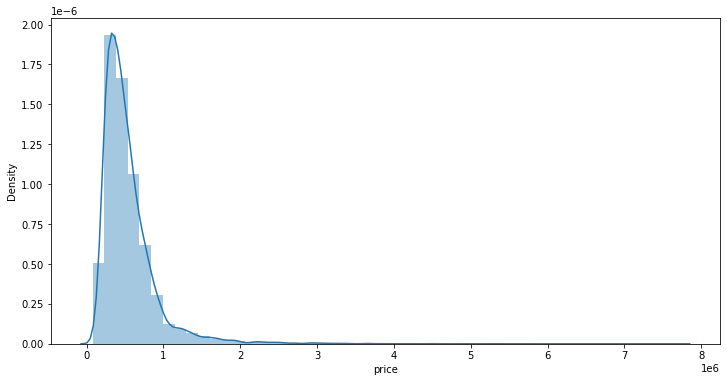

In [14]:
fig, ax = plt.subplots(figsize = (12,6))

sns.distplot(prices)

In [15]:
rooms = data[['bedrooms', 'bathrooms']]

rooms.describe()

,bedrooms,bathrooms
count,21597.000000,21597.000000
mean,3.373200,2.115826
std,0.926299,0.768984
min,1.000000,0.500000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


In [16]:
data['yr_renovated'].describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [17]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
data.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [19]:
data['sqft_basement'] = data['sqft_basement'].replace("?", np.nan)
data['sqft_basement'] = data['sqft_basement'].astype('float64')

In [20]:
data.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [21]:
data.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [22]:
data.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [23]:
data[data['sqft_basement'] == 0.00].sort_values('sqft_living')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15367,2856101479,7/1/2014,276000.0,1,0.75,370,1801,1.0,0.0,0.0,...,5,370,0.0,1923,0.0,98117,47.6778,-122.389,1340,5000
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.0,0.0,...,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.0,0.0,...,6,390,0.0,1920,0.0,98103,47.6938,-122.347,1340,5100
8614,6303400395,1/30/2015,325000.0,1,0.75,410,8636,1.0,0.0,0.0,...,4,410,0.0,1953,0.0,98146,47.5077,-122.357,1190,8636
14452,7549801385,6/12/2014,280000.0,1,0.75,420,6720,1.0,0.0,0.0,...,5,420,0.0,1922,0.0,98108,47.5520,-122.311,1420,6720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18579,3023069166,7/8/2014,1140000.0,5,4.00,7320,217800,2.0,0.0,0.0,...,11,7320,0.0,1992,NaN,98058,47.4473,-122.086,3270,34500
11859,8835800350,1/12/2015,1950000.0,4,3.25,7420,167869,2.0,0.0,3.0,...,12,7420,0.0,2002,NaN,98045,47.4548,-121.764,5610,169549
19842,2524069078,1/22/2015,2700000.0,4,4.00,7850,89651,2.0,0.0,0.0,...,12,7850,0.0,2006,0.0,98027,47.5406,-121.982,6210,95832
13398,2426039123,1/30/2015,2420000.0,5,4.75,7880,24250,2.0,0.0,2.0,...,13,7880,0.0,1996,0.0,98177,47.7334,-122.362,2740,10761


In [24]:
good_condition = data[data['condition'] >= 4]
med_condition = data[data['condition'] == 3]
poor_condition = data[data['condition'] < 3]

In [25]:
good_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7378 entries, 3 to 21567
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7378 non-null   int64  
 1   date           7378 non-null   object 
 2   price          7378 non-null   float64
 3   bedrooms       7378 non-null   int64  
 4   bathrooms      7378 non-null   float64
 5   sqft_living    7378 non-null   int64  
 6   sqft_lot       7378 non-null   int64  
 7   floors         7378 non-null   float64
 8   waterfront     6570 non-null   float64
 9   view           7354 non-null   float64
 10  condition      7378 non-null   int64  
 11  grade          7378 non-null   int64  
 12  sqft_above     7378 non-null   int64  
 13  sqft_basement  7223 non-null   float64
 14  yr_built       7378 non-null   int64  
 15  yr_renovated   6063 non-null   float64
 16  zipcode        7378 non-null   int64  
 17  lat            7378 non-null   float64
 18  long   

In [26]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [27]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,-0.004548,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.325008,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.302683,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.282693,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.434576,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015533,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.245144,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.090200,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.276521,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.170972,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [28]:
formula = 'price ~ sqft_living + sqft_living15'
first = ols(formula = formula, data = data).fit()
first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:42:42   Log-Likelihood:            -2.9991e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21594   BIC:                         5.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.926e+04   5427.190    -18.290      0.000    -1.1e+05   -8.86e+04
sqft_living     242.4444      2.945     82.329      0.000     236.672     248.216
sqft_living15    68.0527      3.946     17.248      0.000      60.319      75.786
==============================================================================
Omnibus:                    15568.864   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           682653.257
Skew:                           2.983   Prob(JB):                         0.00
Kurtosis:                      29.889   Cond. No.                     9.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
formula1 = 'price ~ sqft_living + sqft_living15 + bathrooms + bedrooms'
rooms_model = ols(formula = formula1, data = data).fit()
rooms_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     5671.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:42:42   Log-Likelihood:            -2.9964e+05
No. Observations:               21597   AIC:                         5.993e+05
Df Residuals:                   21592   BIC:                         5.993e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.124e+04   7785.367      2.728      0.006    5981.914    3.65e+04
sqft_living     274.6320      3.849     71.355      0.000     267.088     282.176
sqft_living15    60.3673      3.909     15.445      0.000      52.706      68.028
bathrooms      7230.3124   3504.191      2.063      0.039     361.839    1.41e+04
bedrooms      -5.558e+04   2342.834    -23.725      0.000   -6.02e+04    -5.1e+04
==============================================================================
Omnibus:                    15088.233   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           601249.714
Skew:                           2.874   Prob(JB):                         0.00
Kurtosis:                      28.201   Cond. No.                     1.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

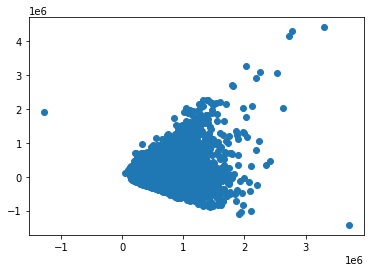

In [30]:
x = rooms_model.predict(data[['sqft_living','sqft_living15','bathrooms','bedrooms']])
y = rooms_model.resid
plt.scatter(x, y)

In [31]:
rooms_model.resid.max()
x.max()

data.loc[x[x == x.min()].index]

#data.loc[y[y == y.max()].index]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


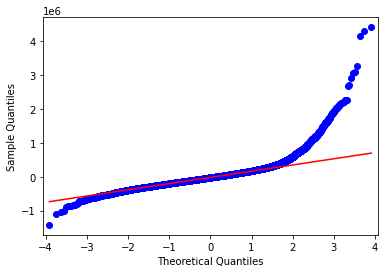

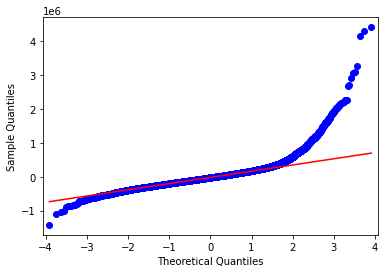

In [32]:
from statsmodels.graphics.gofplots import qqplot

qqplot(rooms_model.resid, line = 'q')

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

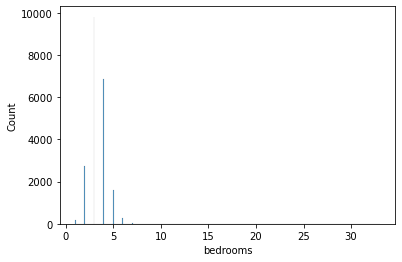

In [33]:
sns.histplot(data['bedrooms'])

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

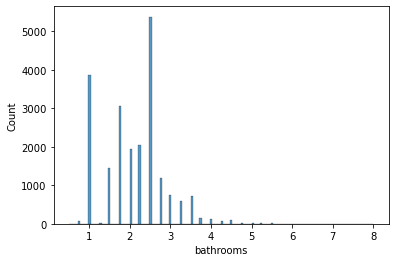

In [34]:
sns.histplot(data['bathrooms'])

In [35]:
house_grades = data[data['grade'] >= 6]

In [36]:
house_grades.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
12      89
13      13
Name: grade, dtype: int64

In [37]:
data['price_per_sqft'] = data['price'] / data['sqft_living']
data['price_per_lot_sqft'] = data['price'] / data['sqft_lot']

In [38]:
data['price_per_sqft'].describe()

count    21597.000000
mean       264.143368
std        110.000061
min         87.588235
25%        182.291667
50%        244.644550
75%        318.333333
max        810.138889
Name: price_per_sqft, dtype: float64

In [39]:
data['sqft_above'] = data['sqft_above'].astype('float64')

In [40]:
data['yard_size'] = data['sqft_lot']-data['sqft_above']-data['sqft_basement']

In [41]:
data.dtypes

id                      int64
date                   object
price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
waterfront            float64
view                  float64
condition               int64
grade                   int64
sqft_above            float64
sqft_basement         float64
yr_built                int64
yr_renovated          float64
zipcode                 int64
lat                   float64
long                  float64
sqft_living15           int64
sqft_lot15              int64
price_per_sqft        float64
price_per_lot_sqft    float64
yard_size             float64
dtype: object

In [42]:
data.yard_size.value_counts()

 4780.0     20
 3420.0     20
 2910.0     20
 2570.0     19
 3120.0     19
            ..
 2924.0      1
-517.0       1
 7096.0      1
 38057.0     1
 2856.0      1
Name: yard_size, Length: 10578, dtype: int64

In [43]:
data[data['yard_size'] <= 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size
63,9528102996,12/7/2014,549000.0,3,1.75,1540,1044,3.0,0.0,0.0,...,2014,0.0,98115,47.6765,-122.320,1580,3090,356.493506,525.862069,-496.0
116,3362400431,6/26/2014,518500.0,3,3.50,1590,1102,3.0,0.0,0.0,...,2010,0.0,98103,47.6824,-122.347,1620,3166,326.100629,470.508167,-488.0
175,7234600798,2/10/2015,425000.0,3,2.50,1120,1100,2.0,0.0,0.0,...,2008,0.0,98122,47.6106,-122.310,1590,1795,379.464286,386.363636,-20.0
406,7821200390,8/6/2014,450000.0,3,2.00,1290,1213,3.0,0.0,0.0,...,2001,0.0,98103,47.6609,-122.344,1290,3235,348.837209,370.981039,-77.0
547,7899800860,3/19/2015,259950.0,2,2.00,1070,649,2.0,0.0,0.0,...,2008,0.0,98106,47.5213,-122.357,1070,928,242.943925,400.539291,-421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,0.0,0.0,...,2006,NaN,98103,47.6533,-122.346,1530,1282,339.869281,530.071356,-549.0
21585,5100403806,4/7/2015,467000.0,3,2.50,1425,1179,3.0,0.0,0.0,...,2008,0.0,98125,47.6963,-122.318,1285,1253,327.719298,396.098388,-246.0
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,0.0,0.0,...,2014,0.0,98144,47.5699,-122.288,1400,1230,287.919463,380.994671,-364.0
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,2008,0.0,98116,47.5773,-122.409,1330,1265,362.595420,367.078825,-16.0


In [44]:
unincorporated_zipcodes = [98019, 98014, 98024, 98065, 98038, 98051, 98022, 98045, 98288, 98224,98051, 98029, 98014, 98077, 98053, 98010, 98070]

In [45]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,...,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.005244,0.059813,-0.132485
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,...,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.556056,0.308066,0.072544
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,...,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.205905,-0.062884,0.019449
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,...,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.090285,0.202578,0.071307
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,...,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.091167,0.022404,0.151197
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,...,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034749,-0.206256,0.999757
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,...,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.004651,0.477914,-0.015484
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,...,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.197233,0.029918,0.020138
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,...,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.221284,0.077953,0.066582
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,...,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.103213,-0.086069,-0.008334


In [46]:
unincorporated_zipcodes = list(set(unincorporated_zipcodes))

In [47]:
country_data = data[data['zipcode'].isin(unincorporated_zipcodes)]

In [48]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 5 to 21587
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2883 non-null   int64  
 1   date                2883 non-null   object 
 2   price               2883 non-null   float64
 3   bedrooms            2883 non-null   int64  
 4   bathrooms           2883 non-null   float64
 5   sqft_living         2883 non-null   int64  
 6   sqft_lot            2883 non-null   int64  
 7   floors              2883 non-null   float64
 8   waterfront          2578 non-null   float64
 9   view                2876 non-null   float64
 10  condition           2883 non-null   int64  
 11  grade               2883 non-null   int64  
 12  sqft_above          2883 non-null   float64
 13  sqft_basement       2824 non-null   float64
 14  yr_built            2883 non-null   int64  
 15  yr_renovated        2389 non-null   float64
 16  zipco

In [49]:
data['month_sold'] = data['date'].map(lambda x: x.split('/')[0]).astype('int64')

In [50]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,188.050847,39.274336,4470.0,10
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,209.338521,74.288870,4672.0,12
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,NaN,98028,47.7379,-122.233,2720,8062,233.766234,18.000000,9230.0,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,308.163265,120.800000,3040.0,12
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,303.571429,63.118812,6400.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,98103,47.6993,-122.346,1530,1509,235.294118,318.302387,-399.0,5
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,98146,47.5107,-122.362,1830,7200,173.160173,68.811285,3503.0,2
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,98144,47.5944,-122.299,1020,2007,394.216667,297.852593,330.0,6
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,0.0,98027,47.5345,-122.069,1410,1287,250.000000,167.504188,788.0,1


In [51]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,...,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.005244,0.059813,-0.132485,-0.011572
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,...,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,0.556056,0.308066,0.072544,-0.009928
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,...,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.205905,-0.062884,0.019449,-0.001046
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,...,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.090285,0.202578,0.071307,0.007543
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,...,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.091167,0.022404,0.151197,0.012112
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,...,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034749,-0.206256,0.999757,-0.002591
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,...,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.004651,0.477914,-0.015484,0.014245
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,...,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.197233,0.029918,0.020138,0.008470
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,...,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.221284,0.077953,0.066582,-0.005327
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,...,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.103213,-0.086069,-0.008334,0.022388


In [52]:
data['unincorporated'] = np.where(data['zipcode'].isin(unincorporated_zipcodes), 1, 0)

In [53]:
data[data['unincorporated']  == 1].sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unincorporated
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,98014,47.6499,-121.909,1200,7500,186.046512,15.841584,4620.0,5,1
17183,5111400086,5/12/2014,110000.0,3,1.00,1250,53143,1.0,0.0,0.0,...,98038,47.4235,-122.051,1820,217800,88.000000,2.069887,51893.0,5,1
8073,1545807810,10/21/2014,118000.0,1,1.00,670,7957,1.0,0.0,0.0,...,98038,47.3594,-122.056,1600,7957,176.119403,14.829710,7287.0,10,1
5522,3821200050,6/4/2014,119500.0,3,1.00,1170,11000,1.0,0.0,0.0,...,98019,47.7346,-121.983,1590,10894,102.136752,10.863636,9830.0,6,1
3389,1917300025,1/27/2015,122000.0,2,1.00,860,6000,1.0,0.0,0.0,...,98022,47.2109,-121.985,1300,6000,141.860465,20.333333,5140.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859,8835800350,1/12/2015,1950000.0,4,3.25,7420,167869,2.0,0.0,3.0,...,98045,47.4548,-121.764,5610,169549,262.803235,11.616201,160449.0,1,1
6685,2624089007,3/20/2015,2000000.0,2,2.50,3900,920423,2.0,0.0,0.0,...,98065,47.5371,-121.756,2720,411962,512.820513,2.172914,916523.0,3,1
8436,125069038,11/25/2014,2140000.0,4,3.75,5150,453895,2.0,NaN,3.0,...,98053,47.6795,-121.991,2500,215186,415.533981,4.714747,448745.0,11,1
11736,3629940160,3/11/2015,2200000.0,5,4.50,5840,17168,2.0,0.0,0.0,...,98029,47.5457,-121.991,4850,15017,376.712329,128.145387,11328.0,3,1


# Subset data to OLS data for prediction

In [54]:
ols_data = data.drop(columns = ['date','id', 'bathrooms','sqft_lot15', 'sqft_lot', 'view', 'lat', 'long', 'sqft_above'])
ols_data

,price,bedrooms,sqft_living,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unincorporated
0,221900.0,3,1180,1.0,NaN,3,7,0.0,1955,0.0,98178,1340,188.050847,39.274336,4470.0,10,0
1,538000.0,3,2570,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,209.338521,74.288870,4672.0,12,0
2,180000.0,2,770,1.0,0.0,3,6,0.0,1933,NaN,98028,2720,233.766234,18.000000,9230.0,2,0
3,604000.0,4,1960,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,308.163265,120.800000,3040.0,12,0
4,510000.0,3,1680,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,303.571429,63.118812,6400.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,1530,3.0,0.0,3,8,0.0,2009,0.0,98103,1530,235.294118,318.302387,-399.0,5,0
21593,400000.0,4,2310,2.0,0.0,3,8,0.0,2014,0.0,98146,1830,173.160173,68.811285,3503.0,2,0
21594,402101.0,2,1020,2.0,0.0,3,7,0.0,2009,0.0,98144,1020,394.216667,297.852593,330.0,6,0
21595,400000.0,3,1600,2.0,NaN,3,8,0.0,2004,0.0,98027,1410,250.000000,167.504188,788.0,1,0


In [55]:
ols_data.corr()

,price,bedrooms,sqft_living,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unincorporated
price,1.000000,0.308787,0.701917,0.256804,0.276295,0.036056,0.667951,0.325008,0.053953,0.129599,-0.053402,0.585241,0.556056,0.308066,0.072544,-0.009928,-0.044163
bedrooms,0.308787,1.000000,0.578212,0.177944,-0.002386,0.026496,0.356563,0.302683,0.155670,0.018495,-0.154092,0.393406,-0.205905,-0.062884,0.019449,-0.001046,-0.016011
sqft_living,0.701917,0.578212,1.000000,0.353953,0.110230,-0.059445,0.762779,0.434576,0.318152,0.055660,-0.199802,0.756402,-0.091167,0.022404,0.151197,0.012112,0.088962
floors,0.256804,0.177944,0.353953,1.000000,0.021883,-0.264075,0.458794,-0.245144,0.489193,0.003535,-0.059541,0.280102,0.004651,0.477914,-0.015484,0.014245,0.125005
waterfront,0.276295,-0.002386,0.110230,0.021883,1.000000,0.017642,0.087383,0.090200,-0.026079,0.087244,0.031057,0.088860,0.197233,0.029918,0.020138,0.008470,0.000735
condition,0.036056,0.026496,-0.059445,-0.264075,0.017642,1.000000,-0.146896,0.170972,-0.361592,-0.061858,0.002888,-0.093072,0.103213,-0.086069,-0.008334,0.022388,-0.109563
grade,0.667951,0.356563,0.762779,0.458794,0.087383,-0.146896,1.000000,0.168023,0.447865,0.016669,-0.185771,0.713867,0.125200,0.218269,0.096742,0.008989,0.056425
sqft_basement,0.325008,0.302683,0.434576,-0.245144,0.090200,0.170972,0.168023,1.000000,-0.132844,0.073591,0.075381,0.201579,-0.023843,0.057304,0.005867,0.007052,-0.154374
yr_built,0.053953,0.155670,0.318152,0.489193,-0.026079,-0.361592,0.447865,-0.132844,1.000000,-0.225209,-0.347210,0.326377,-0.290041,0.124420,0.045813,-0.006235,0.249255
yr_renovated,0.129599,0.018495,0.055660,0.003535,0.087244,-0.061858,0.016669,0.073591,-0.225209,1.000000,0.069846,-0.000247,0.110537,0.039131,0.002320,0.008769,-0.029059


In [56]:
neighbor_sqft_means = data.groupby('unincorporated')['sqft_living15'].mean()
neighbor_sqft_means

unincorporated
0    1953.680026
1    2200.440860
Name: sqft_living15, dtype: float64

In [57]:
location_per_sqft = data.groupby('unincorporated')['price_per_sqft'].mean()
location_per_sqft

unincorporated
0    270.539063
1    222.627922
Name: price_per_sqft, dtype: float64

In [58]:
zipcode_per_sqft = data.groupby('zipcode')['price_per_sqft'].mean()
zipcode_per_sqft

zipcode
98001    151.347966
98002    151.174091
98003    157.113414
98004    475.609615
98005    314.966998
            ...    
98177    292.982095
98178    189.172528
98188    169.007306
98198    178.434333
98199    376.659850
Name: price_per_sqft, Length: 70, dtype: float64

In [59]:
df = data.groupby('zipcode')['price_per_sqft'].mean()
ranges = [0,100,200,300,400,500,600]
df.groupby(pd.cut(df.values, ranges)).count()

(0, 100]       0
(100, 200]    18
(200, 300]    32
(300, 400]    13
(400, 500]     6
(500, 600]     1
Name: price_per_sqft, dtype: int64

<BarContainer object of 70 artists>

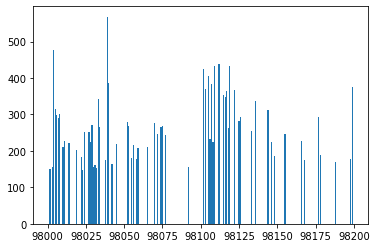

In [60]:
plt.bar(zipcode_per_sqft.index, zipcode_per_sqft.values)

In [61]:
zipcode_per_sqft.loc[98178]

189.17252830749558

In [62]:
zipcode_per_sqft.index

Int64Index([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
            98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
            98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
            98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
            98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
            98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
            98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
            98166, 98168, 98177, 98178, 98188, 98198, 98199],
           dtype='int64', name='zipcode')

In [63]:
def zipcode_price(zipcode):
    try:
        return zipcode_per_sqft.loc[zipcode]
    except:
        return np.nan  

In [64]:
type(ols_data['zipcode'][1])

numpy.int64

In [65]:
ols_data['zip_psqft'] = ols_data['zipcode'].apply(zipcode_price)

In [66]:
ols_data.isna().sum()

price                    0
bedrooms                 0
sqft_living              0
floors                   0
waterfront            2376
condition                0
grade                    0
sqft_basement          454
yr_built                 0
yr_renovated          3842
zipcode                  0
sqft_living15            0
price_per_sqft           0
price_per_lot_sqft       0
yard_size              454
month_sold               0
unincorporated           0
zip_psqft                0
dtype: int64

In [67]:
ols_data.describe()

,price,bedrooms,sqft_living,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unincorporated,zip_psqft
count,2.159700e+04,21597.000000,21597.000000,21597.000000,19221.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.114300e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2080.321850,1.494096,0.007596,3.409825,7.657915,291.851724,1970.999676,83.636778,98077.951845,1986.620318,264.143368,88.988978,1.300622e+04,6.573969,0.133491,264.143368
std,3.673681e+05,0.926299,918.106125,0.539683,0.086825,0.650546,1.173200,442.498337,29.375234,399.946414,53.513072,685.230472,110.000061,94.059663,4.106031e+04,3.115061,0.340112,81.855475
min,7.800000e+04,1.000000,370.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,87.588235,0.163119,-1.900000e+03,1.000000,0.000000,148.921543
25%,3.220000e+05,3.000000,1430.000000,1.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,182.291667,33.333333,3.100000e+03,4.000000,0.000000,189.172528
50%,4.500000e+05,3.000000,1910.000000,1.500000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,244.644550,59.262128,5.720000e+03,6.000000,0.000000,262.623700
75%,6.450000e+05,4.000000,2550.000000,2.000000,0.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,318.333333,107.609531,8.661500e+03,9.000000,0.000000,312.285969
max,7.700000e+06,33.000000,13540.000000,3.500000,1.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,810.138889,2019.704433,1.650059e+06,12.000000,1.000000,568.241828


In [68]:
conditions = [(ols_data['zip_psqft'] >= 100) & (ols_data['zip_psqft'] < 200),
              (ols_data['zip_psqft'] >= 200) & (ols_data['zip_psqft'] < 300),
              (ols_data['zip_psqft'] >= 300) & (ols_data['zip_psqft'] < 400),
              (ols_data['zip_psqft'] >= 400) & (ols_data['zip_psqft'] < 500),
               ols_data['zip_psqft'] >= 500]

choices = [1, 2, 3, 4, 5]


ols_data['location_cost'] = np.select(conditions, choices, default = np.nan)

In [69]:
##zipcodes by price range
zips1 = set(list(ols_data[ols_data['location_cost'] == 1.0]['zipcode'].values))
zips2 = set(list(ols_data[ols_data['location_cost'] == 2.0]['zipcode'].values))
zips3 = set(list(ols_data[ols_data['location_cost'] == 3.0]['zipcode'].values))
zips4 = set(list(ols_data[ols_data['location_cost'] == 4.0]['zipcode'].values))
zips5 = set(list(ols_data[ols_data['location_cost'] == 5.0]['zipcode'].values))

In [70]:
ols_data['location_cost'].value_counts()

2.0    10183
1.0     5440
3.0     4712
4.0     1212
5.0       50
Name: location_cost, dtype: int64

<AxesSubplot:xlabel='location_cost', ylabel='Count'>

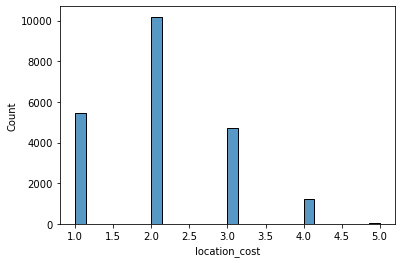

In [71]:
sns.histplot(ols_data['location_cost'])

In [72]:
conditions1 = [(ols_data['yr_built'] >= 1900) & (ols_data['yr_built'] < 1910),
               (ols_data['yr_built'] >= 1910) & (ols_data['yr_built'] < 1920),
               (ols_data['yr_built'] >= 1920) & (ols_data['yr_built'] < 1930),
               (ols_data['yr_built'] >= 1930) & (ols_data['yr_built'] < 1940),
               (ols_data['yr_built'] >= 1940) & (ols_data['yr_built'] < 1950),
               (ols_data['yr_built'] >= 1950) & (ols_data['yr_built'] < 1960),
               (ols_data['yr_built'] >= 1960) & (ols_data['yr_built'] < 1970),
               (ols_data['yr_built'] >= 1970) & (ols_data['yr_built'] < 1980),
               (ols_data['yr_built'] >= 1980) & (ols_data['yr_built'] < 1990),
               (ols_data['yr_built'] >= 1990) & (ols_data['yr_built'] < 2000),
               (ols_data['yr_built'] >= 2000) & (ols_data['yr_built'] < 2010),
               (ols_data['yr_built'] >= 2010) & (ols_data['yr_built'] < 2020)]

choices1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

ols_data['decade_built'] = np.select(conditions1, choices1, np.nan)

# This is where we can subset from to create different models

In [73]:
ols_data.columns

Index(['price', 'bedrooms', 'sqft_living', 'floors', 'waterfront', 'condition',
       'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'price_per_sqft', 'price_per_lot_sqft', 'yard_size',
       'month_sold', 'unincorporated', 'zip_psqft', 'location_cost',
       'decade_built'],
      dtype='object')

## Second model attempt

In [74]:
ols2 = ols_data.drop(columns = ['waterfront', 'yr_renovated', 'price_per_sqft', 'price_per_lot_sqft', 'yard_size', 'zip_psqft'])

In [75]:
ols2.isna().sum()

price               0
bedrooms            0
sqft_living         0
floors              0
condition           0
grade               0
sqft_basement     454
yr_built            0
zipcode             0
sqft_living15       0
month_sold          0
unincorporated      0
location_cost       0
decade_built        0
dtype: int64

In [76]:
ols2.dropna(inplace = True)
ols2.isna().sum()
ols2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21143 non-null  float64
 1   bedrooms        21143 non-null  int64  
 2   sqft_living     21143 non-null  int64  
 3   floors          21143 non-null  float64
 4   condition       21143 non-null  int64  
 5   grade           21143 non-null  int64  
 6   sqft_basement   21143 non-null  float64
 7   yr_built        21143 non-null  int64  
 8   zipcode         21143 non-null  int64  
 9   sqft_living15   21143 non-null  int64  
 10  month_sold      21143 non-null  int64  
 11  unincorporated  21143 non-null  int32  
 12  location_cost   21143 non-null  float64
 13  decade_built    21143 non-null  float64
dtypes: float64(5), int32(1), int64(8)
memory usage: 2.3 MB


In [77]:
X_cats = ['bedrooms', 'floors', 'condition', 'grade', 'yr_built', 'month_sold', 'location_cost']  
  
bed_dummies = pd.get_dummies(ols2['bedrooms'].astype(int), prefix='bed', drop_first=True)
floor_dummies = pd.get_dummies(ols2['floors'].astype(int), prefix='floor', drop_first=True)
cond_dummies = pd.get_dummies(ols2['condition'].astype(int), prefix='cond', drop_first=True)
grade_dummies = pd.get_dummies(ols2['grade'].astype(int), prefix='grade', drop_first=True)
built_dummies = pd.get_dummies(ols2['yr_built'].astype(int), prefix='built', drop_first=True)
month_dummies = pd.get_dummies(ols2['month_sold'].astype(int), prefix='month', drop_first=True)
loc_dummies = pd.get_dummies(ols2['location_cost'].astype(int), prefix='loc', drop_first=True)

In [78]:
ols2.drop(columns = ['bedrooms', 'floors', 'condition', 'grade', 'yr_built', 'month_sold', 'location_cost'], inplace = True)
ols2 = pd.concat([ols2, bed_dummies, floor_dummies, cond_dummies, grade_dummies, built_dummies, month_dummies, loc_dummies], axis = 1)

In [79]:
ols2

,price,sqft_living,sqft_basement,zipcode,sqft_living15,unincorporated,decade_built,bed_2,bed_3,bed_4,...,month_7,month_8,month_9,month_10,month_11,month_12,loc_2,loc_3,loc_4,loc_5
0,221900.0,1180,0.0,98178,1340,0,5.0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,2570,400.0,98125,1690,0,5.0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,180000.0,770,0.0,98028,2720,0,3.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,1960,910.0,98136,1360,0,6.0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,510000.0,1680,0.0,98074,1800,0,8.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,0.0,98103,1530,0,10.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21593,400000.0,2310,0.0,98146,1830,0,11.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
21594,402101.0,1020,0.0,98144,1020,0,10.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,1600,0.0,98027,1410,0,10.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [80]:
from sklearn.preprocessing import StandardScaler

X_cont = ols2[['sqft_living', 'sqft_basement']]

scaled = StandardScaler().fit_transform(X_cont)


In [81]:
scaled_df = pd.DataFrame(scaled)
scaled_df.rename(columns = {0: "scaled_sqft_living", 1: "scaled_sqft_basement"}, inplace = True)

In [82]:
ols2.drop(columns = ['sqft_living', 'sqft_basement'], inplace = True)

In [83]:
ols2.join(scaled_df, on = 'loc_5')

,price,zipcode,sqft_living15,unincorporated,decade_built,bed_2,bed_3,bed_4,bed_5,bed_6,...,month_9,month_10,month_11,month_12,loc_2,loc_3,loc_4,loc_5,scaled_sqft_living,scaled_sqft_basement
0,221900.0,98178,1340,0,5.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,-0.980833,-0.65957
1,538000.0,98125,1690,0,5.0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,-0.980833,-0.65957
2,180000.0,98028,2720,0,3.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.980833,-0.65957
3,604000.0,98136,1360,0,6.0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,-0.980833,-0.65957
4,510000.0,98074,1800,0,8.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,-0.980833,-0.65957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,98103,1530,0,10.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,-0.980833,-0.65957
21593,400000.0,98146,1830,0,11.0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,-0.980833,-0.65957
21594,402101.0,98144,1020,0,10.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,-0.980833,-0.65957
21595,400000.0,98027,1410,0,10.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,-0.980833,-0.65957


In [84]:
ols2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Columns: 162 entries, price to loc_5
dtypes: float64(2), int32(1), int64(2), uint8(157)
memory usage: 4.1 MB


In [85]:
target = 'price'
x_cols = ols2.columns.drop(['price', 'zipcode', 'sqft_living15'])
predictors = '+'.join(x_cols)
formula2 = target + '~' + predictors

In [86]:
model2 = ols(formula = formula2, data = ols2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     338.7
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:42:51   Log-Likelihood:            -2.8757e+05
No. Observations:               21143   AIC:                         5.755e+05
Df Residuals:                   20984   BIC:                         5.767e+05
Df Model:                         158                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.377e+05   2.02e+05      0.682      0.495   -2.58e+05    5.34e+05
unincorporated  2.465e+04   4342.437      5.677      0.000    1.61e+04    3.32e+04
decade_built   -5074.3386   2918.321     -1.739      0.082   -1.08e+04     645.796
bed_2           1.325e+04   1.52e+04      0.873      0.383   -1.65e+04     4.3e+04
bed_3           6.778e+04   1.51e+04      4.494      0.000    3.82e+04    9.73e+04
bed_4           1.081e+05   1.52e+04      7.101      0.000    7.83e+04    1.38e+05
bed_5           1.755e+05   1.59e+04     11.059      0.000    1.44e+05    2.07e+05
bed_6           2.241e+05   1.94e+04     11.572      0.000    1.86e+05    2.62e+05
bed_7           2.222e+05   3.61e+04      6.150      0.000    1.51e+05    2.93e+05
bed_8           3.384e+05   5.68e+04      5.960      0.000    2.27e+05     4.5e+05
bed_9           5.716e+04   8.23e+04      0.695      0.487   -1.04e+05    2.18e+05
bed_10           1.24e+05   1.15e+05      1.080      0.280   -1.01e+05    3.49e+05
bed_11          2.188e+05   1.98e+05      1.108      0.268   -1.68e+05    6.06e+05
bed_33          7.231e+04   1.97e+05      0.367      0.714   -3.14e+05    4.59e+05
floor_2         2.211e+04   4273.544      5.173      0.000    1.37e+04    3.05e+04
floor_3        -6.118e+04   9673.027     -6.325      0.000   -8.01e+04   -4.22e+04
cond_2         -1.261e+04   4.04e+04     -0.312      0.755   -9.19e+04    6.67e+04
cond_3          1.095e+04   3.77e+04      0.291      0.771   -6.29e+04    8.48e+04
cond_4          4.445e+04   3.77e+04      1.180      0.238   -2.94e+04    1.18e+05
cond_5          9.771e+04   3.79e+04      2.580      0.010    2.35e+04    1.72e+05
grade_4        -7.676e+04   2.01e+05     -0.382      0.703   -4.71e+05    3.17e+05
grade_5        -8.474e+04   1.98e+05     -0.428      0.669   -4.73e+05    3.03e+05
grade_6        -5.633e+04   1.98e+05     -0.285      0.776   -4.44e+05    3.31e+05
grade_7         1.906e+04   1.98e+05      0.096      0.923   -3.69e+05    4.07e+05
grade_8         1.454e+05   1.98e+05      0.735      0.463   -2.42e+05    5.33e+05
grade_9         3.465e+05   1.98e+05      1.751      0.080   -4.14e+04    7.34e+05
grade_10        6.241e+05   1.98e+05      3.153      0.002    2.36e+05    1.01e+06
grade_11        1.006e+06   1.98e+05      5.078      0.000    6.18e+05    1.39e+06
grade_12        1.705e+06   1.99e+05      8.566      0.000    1.31e+06    2.09e+06
grade_13        2.988e+06   2.05e+05     14.547      0.000    2.59e+06    3.39e+06
built_1901     -1.196e+05   4.29e+04     -2.788      0.005   -2.04e+05   -3.55e+04
built_1902     -1.106e+05   4.35e+04     -2.545      0.011   -1.96e+05   -2.54e+04
built_1903     -6.967e+04   3.65e+04     -1.908      0.056   -1.41e+05    1907.260
built_1904     -1.288e+04   3.66e+04     -0.352      0.725   -8.46e+04    5.88e+04
built_1905  

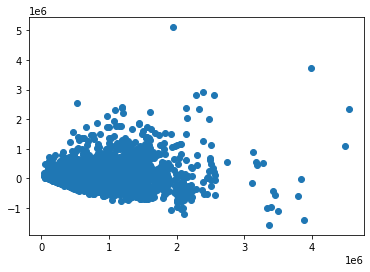

In [87]:
x = model2.predict(ols2)
y = model2.resid
plt.scatter(x, y)

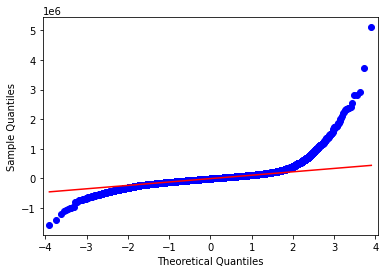

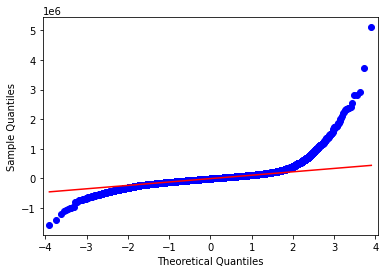

In [88]:
qqplot(model2.resid, line = 'q')

## Third model attempt

In [89]:
ols_data

,price,bedrooms,sqft_living,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unincorporated,zip_psqft,location_cost,decade_built
0,221900.0,3,1180,1.0,NaN,3,7,0.0,1955,0.0,98178,1340,188.050847,39.274336,4470.0,10,0,189.172528,1.0,5.0
1,538000.0,3,2570,2.0,0.0,3,7,400.0,1951,1991.0,98125,1690,209.338521,74.288870,4672.0,12,0,282.680191,2.0,5.0
2,180000.0,2,770,1.0,0.0,3,6,0.0,1933,NaN,98028,2720,233.766234,18.000000,9230.0,2,0,225.145368,2.0,3.0
3,604000.0,4,1960,1.0,0.0,5,7,910.0,1965,0.0,98136,1360,308.163265,120.800000,3040.0,12,0,337.245108,3.0,6.0
4,510000.0,3,1680,1.0,0.0,3,8,0.0,1987,0.0,98074,1800,303.571429,63.118812,6400.0,2,0,265.686627,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,1530,3.0,0.0,3,8,0.0,2009,0.0,98103,1530,235.294118,318.302387,-399.0,5,0,369.882756,3.0,10.0
21593,400000.0,4,2310,2.0,0.0,3,8,0.0,2014,0.0,98146,1830,173.160173,68.811285,3503.0,2,0,225.496990,2.0,11.0
21594,402101.0,2,1020,2.0,0.0,3,7,0.0,2009,0.0,98144,1020,394.216667,297.852593,330.0,6,0,312.285969,3.0,10.0
21595,400000.0,3,1600,2.0,NaN,3,8,0.0,2004,0.0,98027,1410,250.000000,167.504188,788.0,1,0,251.586071,2.0,10.0


In [90]:
ols3 = ols_data.drop(columns = ['bedrooms', 'waterfront', 'condition', 'sqft_basement', 'yr_renovated', 'zipcode', 'price_per_sqft', 'price_per_lot_sqft', 'yard_size', 'zip_psqft'])
ols3


,price,sqft_living,floors,grade,yr_built,sqft_living15,month_sold,unincorporated,location_cost,decade_built
0,221900.0,1180,1.0,7,1955,1340,10,0,1.0,5.0
1,538000.0,2570,2.0,7,1951,1690,12,0,2.0,5.0
2,180000.0,770,1.0,6,1933,2720,2,0,2.0,3.0
3,604000.0,1960,1.0,7,1965,1360,12,0,3.0,6.0
4,510000.0,1680,1.0,8,1987,1800,2,0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,3.0,8,2009,1530,5,0,3.0,10.0
21593,400000.0,2310,2.0,8,2014,1830,2,0,2.0,11.0
21594,402101.0,1020,2.0,7,2009,1020,6,0,3.0,10.0
21595,400000.0,1600,2.0,8,2004,1410,1,0,2.0,10.0


In [91]:
floor_dummies = pd.get_dummies(ols3['floors'].astype(int), prefix='floor', drop_first=True)
grade_dummies = pd.get_dummies(ols3['grade'].astype(int), prefix='grade', drop_first=True)
decade_dummies = pd.get_dummies(ols3['decade_built'].astype(int), prefix='decade', drop_first=True)
month_dummies = pd.get_dummies(ols3['month_sold'].astype(int), prefix='month', drop_first=True)
loc_dummies = pd.get_dummies(ols3['location_cost'].astype(int), prefix='loc', drop_first=True)

ols3.drop(columns = ['unincorporated','floors', 'grade', 'yr_built', 'month_sold', 'location_cost', 'decade_built'], inplace = True)
ols3 = pd.concat([ols3, floor_dummies, grade_dummies, decade_dummies, month_dummies, loc_dummies], axis = 1)

ols3

,price,sqft_living,sqft_living15,floor_2,floor_3,grade_4,grade_5,grade_6,grade_7,grade_8,...,month_7,month_8,month_9,month_10,month_11,month_12,loc_2,loc_3,loc_4,loc_5
0,221900.0,1180,1340,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,2570,1690,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,180000.0,770,2720,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,1960,1360,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,510000.0,1680,1800,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1530,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21593,400000.0,2310,1830,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
21594,402101.0,1020,1020,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,1600,1410,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [92]:
target = 'price'
x_cols = ols3.drop(columns = ['price'])
predictors = '+'.join(x_cols)
formula3 = target + '~' + predictors

x_cols

,sqft_living,sqft_living15,floor_2,floor_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,...,month_7,month_8,month_9,month_10,month_11,month_12,loc_2,loc_3,loc_4,loc_5
0,1180,1340,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2570,1690,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,770,2720,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1960,1360,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1680,1800,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1530,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21593,2310,1830,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
21594,1020,1020,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,1600,1410,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [93]:
model3 = ols(formula = formula3, data = ols3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     1819.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:42:53   Log-Likelihood:            -2.9145e+05
No. Observations:               21597   AIC:                         5.830e+05
Df Residuals:                   21556   BIC:                         5.833e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.011e+05   1.76e+05      0.574      0.566   -2.44e+05    4.46e+05
sqft_living     159.2904      2.355     67.636      0.000     154.674     163.907
sqft_living15    41.4962      2.920     14.211      0.000      35.773      47.219
floor_2       -6206.1620   3742.203     -1.658      0.097   -1.35e+04    1128.833
floor_3       -9990.2622   8481.008     -1.178      0.239   -2.66e+04    6633.141
grade_4       -1.892e+05   1.79e+05     -1.056      0.291    -5.4e+05    1.62e+05
grade_5       -2.002e+05   1.76e+05     -1.135      0.256   -5.46e+05    1.45e+05
grade_6       -1.971e+05   1.76e+05     -1.120      0.263   -5.42e+05    1.48e+05
grade_7       -1.833e+05   1.76e+05     -1.042      0.298   -5.28e+05    1.62e+05
grade_8       -1.397e+05   1.76e+05     -0.793      0.428   -4.85e+05    2.05e+05
grade_9       -4.921e+04   1.76e+05     -0.279      0.780   -3.94e+05    2.96e+05
grade_10       1.121e+05   1.76e+05      0.636      0.525   -2.33e+05    4.57e+05
grade_11       3.478e+05   1.76e+05      1.971      0.049    1998.500    6.94e+05
grade_12       8.567e+05   1.77e+05      4.831      0.000    5.09e+05     1.2e+06
grade_13        1.87e+06   1.83e+05     10.204      0.000    1.51e+06    2.23e+06
decade_1       1.136e+04   9321.079      1.218      0.223   -6912.682    2.96e+04
decade_2       1.596e+04   8628.903      1.849      0.064    -957.915    3.29e+04
decade_3       5.682e+04   1.04e+04      5.471      0.000    3.65e+04    7.72e+04
decade_4       2.162e+04   8249.579      2.621      0.009    5452.464    3.78e+04
decade_5       8971.3433   8024.304      1.118      0.264   -6756.886    2.47e+04
decade_6      -5685.2093   8112.670     -0.701      0.483   -2.16e+04    1.02e+04
decade_7      -2.294e+04   8305.339     -2.762      0.006   -3.92e+04   -6657.201
decade_8       -2.36e+04   8398.549     -2.810      0.005   -4.01e+04   -7140.055
decade_9      -7.164e+04   8647.294     -8.285      0.000   -8.86e+04   -5.47e+04
decade_10     -6.753e+04   8320.981     -8.116      0.000   -8.38e+04   -5.12e+04
decade_11     -3.462e+04   9318.431     -3.715      0.000   -5.29e+04   -1.64e+04
month_2        6542.8408   7515.978      0.871      0.384   -8189.032    2.13e+04
month_3         2.99e+04   6941.189      4.308      0.000    1.63e+04    4.35e+04
month_4        3.638e+04   6749.791      5.390      0.000    2.32e+04    4.96e+04
month_5        6139.6650   6671.771      0.920      0.357   -6937.499    1.92e+04
month_6        4751.2061   6775.077      0.701      0.483   -8528.446     1.8e+04
month_7         539.1297   6758.152      0.080      0.936   -1.27e+04    1.38e+04
month_8        -657.9412   6901.380     -0.095      0.924   -1.42e+04    1.29e+04
month_9       -2914.8418   7009.205     -0.416      0.678   -1.67e+04    1.08e+04
month_10      -3638.5710   6941.020     -0.524   

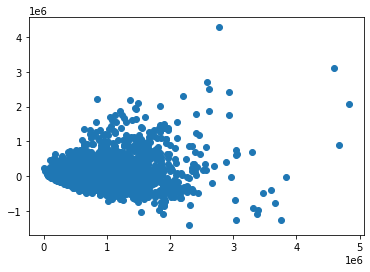

In [94]:
x = model3.predict(ols3)
y = model3.resid
plt.scatter(x, y)

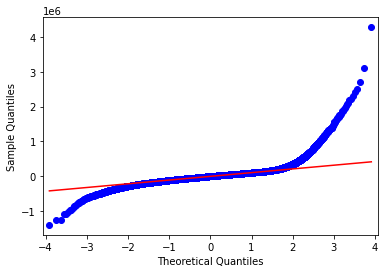

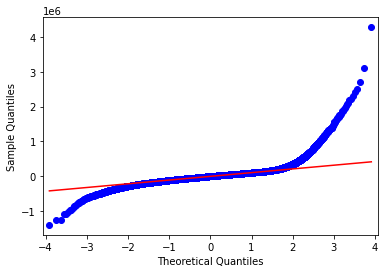

In [95]:
qqplot(model3.resid, line = 'q')

In [96]:
model3.resid.max()
x.max()

data.loc[x[x == x.min()].index] ##insanely high price per square foot outlier

data.loc[y[y == y.max()].index] ##also an insanely high price per square foot outlier

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unincorporated
3910,9808700762,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,1.0,2.0,...,98004,47.65,-122.214,3930,25449,703.187251,189.149364,27285.0,6,0


## Fourth model attempt

In [97]:
ols4 = ols_data.drop(columns = ['bedrooms', 'waterfront', 'condition', 'sqft_basement', 'yr_renovated', 'zipcode', 'price_per_sqft', 'price_per_lot_sqft', 'yard_size', 'zip_psqft'])
ols4.drop(columns = ['sqft_living', 'month_sold', 'unincorporated', 'floors'], inplace = True)\


grade_dummies = pd.get_dummies(ols4['grade'].astype(int), prefix='grade', drop_first=True)
decade_dummies = pd.get_dummies(ols4['decade_built'].astype(int), prefix='decade', drop_first=True)
loc_dummies = pd.get_dummies(ols4['location_cost'].astype(int), prefix='loc', drop_first=True)


ols4.drop(columns = ['grade', 'yr_built', 'location_cost', 'decade_built'], inplace = True)
ols4 = pd.concat([ols4, grade_dummies, decade_dummies, loc_dummies], axis = 1)

ols4

,price,sqft_living15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,...,decade_6,decade_7,decade_8,decade_9,decade_10,decade_11,loc_2,loc_3,loc_4,loc_5
0,221900.0,1340,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,1690,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2720,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,1360,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,510000.0,1800,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
21593,400000.0,1830,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
21594,402101.0,1020,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
21595,400000.0,1410,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [98]:
target = 'price'
x_cols = ols4.drop(columns = ['price'])
predictors = '+'.join(x_cols)
formula4 = target + '~' + predictors

In [99]:
model4 = ols(formula = formula4, data = ols4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     2144.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:42:54   Log-Likelihood:            -2.9361e+05
No. Observations:               21597   AIC:                         5.873e+05
Df Residuals:                   21570   BIC:                         5.875e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.364e+04   1.94e+05      0.379      0.705   -3.07e+05    4.55e+05
sqft_living15   130.7719      2.853     45.843      0.000     125.180     136.363
grade_4       -1.681e+05   1.98e+05     -0.850      0.395   -5.56e+05     2.2e+05
grade_5       -1.221e+05   1.95e+05     -0.627      0.530   -5.04e+05    2.59e+05
grade_6       -8.437e+04   1.94e+05     -0.434      0.664   -4.65e+05    2.96e+05
grade_7       -1.304e+04   1.94e+05     -0.067      0.946   -3.94e+05    3.68e+05
grade_8        7.603e+04   1.94e+05      0.391      0.696   -3.05e+05    4.57e+05
grade_9        2.275e+05   1.94e+05      1.171      0.242   -1.53e+05    6.08e+05
grade_10       4.577e+05   1.94e+05      2.354      0.019    7.65e+04    8.39e+05
grade_11       7.895e+05   1.95e+05      4.056      0.000    4.08e+05    1.17e+06
grade_12       1.432e+06   1.96e+05      7.321      0.000    1.05e+06    1.81e+06
grade_13        2.75e+06   2.02e+05     13.624      0.000    2.35e+06    3.15e+06
decade_1       2.255e+04   1.03e+04      2.193      0.028    2398.059    4.27e+04
decade_2       1.312e+04   9511.672      1.379      0.168   -5522.273    3.18e+04
decade_3       5.033e+04   1.15e+04      4.393      0.000    2.79e+04    7.28e+04
decade_4       1.211e+04   9084.372      1.333      0.183   -5695.604    2.99e+04
decade_5      -5102.4564   8799.109     -0.580      0.562   -2.23e+04    1.21e+04
decade_6      -1.235e+04   8893.677     -1.388      0.165   -2.98e+04    5086.933
decade_7      -3.207e+04   9131.212     -3.512      0.000      -5e+04   -1.42e+04
decade_8      -5.251e+04   9215.162     -5.698      0.000   -7.06e+04   -3.44e+04
decade_9      -1.001e+05   9338.351    -10.723      0.000   -1.18e+05   -8.18e+04
decade_10     -8.199e+04   8825.702     -9.290      0.000   -9.93e+04   -6.47e+04
decade_11     -4.629e+04   9965.944     -4.645      0.000   -6.58e+04   -2.68e+04
loc_2          1.324e+05   3356.737     39.434      0.000    1.26e+05    1.39e+05
loc_3          3.012e+05   4298.879     70.062      0.000    2.93e+05     3.1e+05
loc_4          5.251e+05   6769.909     77.567      0.000    5.12e+05    5.38e+05
loc_5          1.189e+06   2.79e+04     42.604      0.000    1.13e+06    1.24e+06
==============================================================================
Omnibus:                    20476.298   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3193222.953
Skew:                           4.139   Prob(JB):                         0.00
Kurtosis:                      61.991   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This

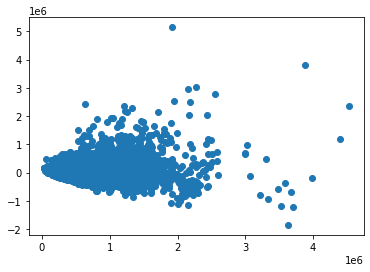

In [100]:
x = model4.predict(ols4)
y = model4.resid
plt.scatter(x, y)

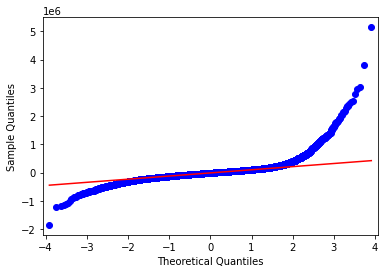

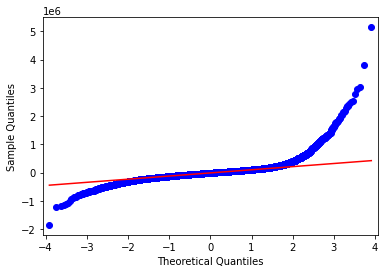

In [101]:
qqplot(model4.resid, line = 'q')

In [102]:
data.loc[y[y == y.min()].index] ##insanely high price per square foot outlier

data.loc[y[y == y.max()].index] ##also an insanely high price per square foot outlier

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unincorporated
3910,9808700762,6/11/2014,7060000.0,5,4.5,10040,37325,2.0,1.0,2.0,...,98004,47.65,-122.214,3930,25449,703.187251,189.149364,27285.0,6,0


# Addressing Outliers

In [103]:
ols_data.corr()

,price,bedrooms,sqft_living,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,price_per_sqft,price_per_lot_sqft,yard_size,month_sold,unincorporated,zip_psqft,location_cost,decade_built
price,1.000000,0.308787,0.701917,0.256804,0.276295,0.036056,0.667951,0.325008,0.053953,0.129599,-0.053402,0.585241,0.556056,0.308066,0.072544,-0.009928,-0.044163,0.532667,0.505115,0.055330
bedrooms,0.308787,1.000000,0.578212,0.177944,-0.002386,0.026496,0.356563,0.302683,0.155670,0.018495,-0.154092,0.393406,-0.205905,-0.062884,0.019449,-0.001046,-0.016011,-0.006412,-0.002194,0.155447
sqft_living,0.701917,0.578212,1.000000,0.353953,0.110230,-0.059445,0.762779,0.434576,0.318152,0.055660,-0.199802,0.756402,-0.091167,0.022404,0.151197,0.012112,0.088962,0.090229,0.084669,0.318482
floors,0.256804,0.177944,0.353953,1.000000,0.021883,-0.264075,0.458794,-0.245144,0.489193,0.003535,-0.059541,0.280102,0.004651,0.477914,-0.015484,0.014245,0.125005,0.114427,0.118470,0.489035
waterfront,0.276295,-0.002386,0.110230,0.021883,1.000000,0.017642,0.087383,0.090200,-0.026079,0.087244,0.031057,0.088860,0.197233,0.029918,0.020138,0.008470,0.000735,0.010312,0.007347,-0.025491
condition,0.036056,0.026496,-0.059445,-0.264075,0.017642,1.000000,-0.146896,0.170972,-0.361592,-0.061858,0.002888,-0.093072,0.103213,-0.086069,-0.008334,0.022388,-0.109563,0.071603,0.066862,-0.363256
grade,0.667951,0.356563,0.762779,0.458794,0.087383,-0.146896,1.000000,0.168023,0.447865,0.016669,-0.185771,0.713867,0.125200,0.218269,0.096742,0.008989,0.056425,0.191279,0.171502,0.445586
sqft_basement,0.325008,0.302683,0.434576,-0.245144,0.090200,0.170972,0.168023,1.000000,-0.132844,0.073591,0.075381,0.201579,-0.023843,0.057304,0.005867,0.007052,-0.154374,0.186897,0.174138,-0.135430
yr_built,0.053953,0.155670,0.318152,0.489193,-0.026079,-0.361592,0.447865,-0.132844,1.000000,-0.225209,-0.347210,0.326377,-0.290041,0.124420,0.045813,-0.006235,0.249255,-0.279134,-0.270812,0.995210
yr_renovated,0.129599,0.018495,0.055660,0.003535,0.087244,-0.061858,0.016669,0.073591,-0.225209,1.000000,0.069846,-0.000247,0.110537,0.039131,0.002320,0.008769,-0.029059,0.109457,0.104940,-0.221450


In [104]:
ols5 = ols_data[(ols_data['price_per_sqft'] > 150) & (ols_data['price_per_sqft'] < 375)]
ols5.columns
ols5 = ols5.drop(columns = ['sqft_living', 'floors', 'waterfront', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'price_per_sqft', 'price_per_lot_sqft', 'yard_size', 'month_sold', 'unincorporated', 'zip_psqft'])
ols5

,price,bedrooms,grade,sqft_living15,location_cost,decade_built
0,221900.0,3,7,1340,1.0,5.0
1,538000.0,3,7,1690,2.0,5.0
2,180000.0,2,6,2720,2.0,3.0
3,604000.0,4,7,1360,3.0,6.0
4,510000.0,3,8,1800,2.0,8.0
...,...,...,...,...,...,...
21591,475000.0,3,8,1330,3.0,10.0
21592,360000.0,3,8,1530,3.0,10.0
21593,400000.0,4,8,1830,2.0,11.0
21595,400000.0,3,8,1410,2.0,10.0


In [105]:
grade_dummies = pd.get_dummies(ols5['grade'].astype(int), prefix='grade', drop_first=True)
decade_dummies = pd.get_dummies(ols5['decade_built'].astype(int), prefix='decade', drop_first=True)
loc_dummies = pd.get_dummies(ols5['location_cost'].astype(int), prefix='loc', drop_first=True)

ols5.drop(columns = ['grade', 'location_cost', 'decade_built'], inplace = True)
ols5 = pd.concat([ols5, grade_dummies, decade_dummies, loc_dummies], axis = 1)

ols5

,price,bedrooms,sqft_living15,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,...,decade_5,decade_6,decade_7,decade_8,decade_9,decade_10,decade_11,loc_2,loc_3,loc_4
0,221900.0,3,1340,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,538000.0,3,1690,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,180000.0,2,2720,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,1360,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,510000.0,3,1800,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,1330,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
21592,360000.0,3,1530,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
21593,400000.0,4,1830,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
21595,400000.0,3,1410,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [106]:
target = 'price'
x_cols = ols5.drop(columns = ['price'])
predictors = '+'.join(x_cols)
formula5 = target + '~' + predictors


model5 = ols(formula = formula5, data = ols5).fit()
#model5.summary()

x_cols

,bedrooms,sqft_living15,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,...,decade_5,decade_6,decade_7,decade_8,decade_9,decade_10,decade_11,loc_2,loc_3,loc_4
0,3,1340,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,1690,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2,2720,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1360,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,3,1800,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,1330,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
21592,3,1530,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
21593,4,1830,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
21595,3,1410,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [107]:
target = 'price'
x_cols = ols5.drop(columns = 'bedrooms', axis = 1).columns


predictors = '+'.join(x_cols)
formula6 = target + '~' + predictors


model6 = ols(formula = formula6, data = ols5).fit()
model6.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.268e+32
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:42:56   Log-Likelihood:             3.2361e+05
No. Observations:               16031   AIC:                        -6.472e+05
Df Residuals:                   16005   BIC:                        -6.470e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.403e-10   1.06e-10      5.074      0.000    3.32e-10    7.49e-10
price             1.0000   2.72e-17   3.68e+16      0.000       1.000       1.000
sqft_living15  -2.64e-14   7.92e-15     -3.333      0.001   -4.19e-14   -1.09e-14
grade_5        9.276e-11   1.09e-10      0.850      0.395   -1.21e-10    3.07e-10
grade_6        6.094e-11   1.04e-10      0.585      0.559   -1.43e-10    2.65e-10
grade_7        3.809e-12   1.04e-10      0.037      0.971      -2e-10    2.08e-10
grade_8        1.864e-10   1.05e-10      1.781      0.075   -1.87e-11    3.92e-10
grade_9        7.329e-11   1.06e-10      0.694      0.487   -1.34e-10     2.8e-10
grade_10      -6.662e-11   1.07e-10     -0.623      0.533   -2.76e-10    1.43e-10
grade_11       3.059e-10   1.11e-10      2.768      0.006    8.93e-11    5.22e-10
grade_12      -1.839e-10   1.26e-10     -1.461      0.144   -4.31e-10    6.29e-11
grade_13      -1.025e-09   2.38e-10     -4.305      0.000   -1.49e-09   -5.58e-10
decade_1       1.057e-10   2.93e-11      3.607      0.000    4.83e-11    1.63e-10
decade_2      -5.237e-11   2.71e-11     -1.932      0.053   -1.06e-10    7.63e-13
decade_3      -1.844e-11   3.21e-11     -0.574      0.566   -8.14e-11    4.45e-11
decade_4       -7.68e-11   2.55e-11     -3.011      0.003   -1.27e-10   -2.68e-11
decade_5      -6.614e-11   2.46e-11     -2.687      0.007   -1.14e-10   -1.79e-11
decade_6      -3.173e-11   2.48e-11     -1.280      0.200   -8.03e-11    1.68e-11
decade_7       8.519e-12   2.52e-11      0.338      0.735   -4.09e-11    5.79e-11
decade_8       1.775e-11   2.53e-11      0.701      0.484   -3.19e-11    6.74e-11
decade_9       1.792e-10   2.57e-11      6.979      0.000    1.29e-10     2.3e-10
decade_10     -1.058e-10   2.47e-11     -4.281      0.000   -1.54e-10   -5.73e-11
decade_11     -6.821e-13   2.72e-11     -0.025      0.980    -5.4e-11    5.26e-11
loc_2         -1.486e-11   9.26e-12     -1.606      0.108    -3.3e-11    3.28e-12
loc_3         -3.183e-11   1.32e-11     -2.416      0.016   -5.77e-11   -6.01e-12
loc_4         -8.103e-11   2.59e-11     -3.133      0.002   -1.32e-10   -3.03e-11
==============================================================================
Omnibus:                     6465.580   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45824.223
Skew:                           1.778   Prob(JB):                         0.00
Kurtosis:                      10.481   Cond. No.                     5.95e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+07. This might indicate that there are
strong multicollinearity or other numerical problem

In [108]:
x_cols

Index(['price', 'sqft_living15', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'decade_1',
       'decade_2', 'decade_3', 'decade_4', 'decade_5', 'decade_6', 'decade_7',
       'decade_8', 'decade_9', 'decade_10', 'decade_11', 'loc_2', 'loc_3',
       'loc_4'],
      dtype='object')

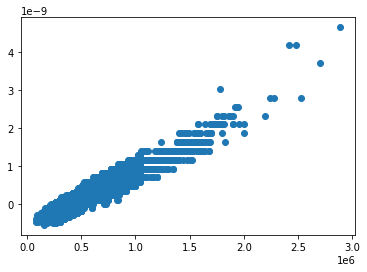

In [109]:
x = model6.predict(ols5)
y = model6.resid
plt.scatter(x, y)

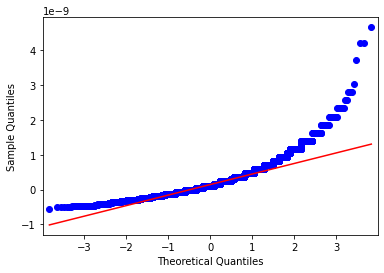

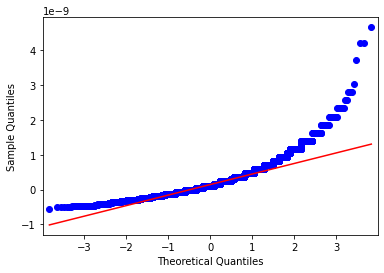

In [110]:
qqplot(model6.resid, line = 'q')

In [111]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_x = ss.fit_transform(x_cols)

target = 'price'
predictors = '+'.join(x_cols)
formula7 = target + '~' + predictors

model7 = ols(formula = formula7, data = ols5).fit()
model7.summary()

ValueError: could not convert string to float: 'price'

In [ ]:
ols_data

In [ ]:
ols6 = ols_data.drop(columns = ['bedrooms', 'waterfront', 'condition','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'price_per_sqft', 'price_per_lot_sqft', 'yard_size', 'zip_psqft'], axis = 1)
ols6

In [ ]:
cont = ['sqft_living', 'sqft_living15']
ols6_cont = ols6[cont]
target = ['price']
ols6_target = ols6[target]

log_names = [f'{column}_log' for column in ols6_cont.columns]
ols6_log = np.log(ols6_cont)
ols6_log.columns = log_names

ols6_target_log = np.log(ols6_target)
ols6_target_log.columns = target



ols6_log.hist(figsize=(10, 10), bins='auto');
ols6_target_log.hist(figsize = (5,5), bins = 'auto');


In [ ]:
ols6.drop(columns = 'sqft_living', axis = 1, inplace = True)

floor_dummies = pd.get_dummies(ols6['floors'].astype(int), prefix = 'floors', drop_first = True)
grade_dummies = pd.get_dummies(ols6['grade'].astype(int), prefix='grade', drop_first=True)
month_dummies = pd.get_dummies(ols6['month_sold'].astype(int), prefix = 'month', drop_first = True)
loc_dummies = pd.get_dummies(ols6['location_cost'].astype(int), prefix='loc', drop_first=True)
decade_dummies = pd.get_dummies(ols6['decade_built'].astype(int), prefix='decade', drop_first=True)

ols6.drop(columns = ['floors','grade', 'month_sold', 'location_cost', 'decade_built'], inplace = True)
ols6 = pd.concat([ols6, floor_dummies, grade_dummies, decade_dummies, loc_dummies, decade_dummies], axis = 1)

In [ ]:
ols6.corr()

In [ ]:
ols6['price'] = ols6_target_log
ols6[cont] = ols6_log

In [ ]:
ols6

In [ ]:
target6 = 'price'
x_cols = ols6.drop(columns = ['price'], axis = 1).columns
predictors6 = '+'.join(x_cols)

formula6 = target6 + '~' + predictors6

model6 = ols(formula = formula6, data = ols6).fit()
model6.summary()